# Clean/Explore Notebook

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.tsa.api import Holt
from datetime import datetime

In [2]:
census = pd.read_csv('census_data_overview.csv')

In [3]:
census.head()

,periodicity,periodicity_label.value,seasonadj,seasonadj_label.value,geo_level,geo_level_label.value,geography,geography_label.value,ind_level,industry,...,sFrmJbC,sHirAEndRepl,sHirAEndReplR,sFrmJbGnS,sEarnS,sEarnBeg,sEarnHirAS,sEarnHirNS,sEarnSepS,sPayroll
0,Q,Quarterly data,U,Not seasonally adjusted,S,States,48,Texas,3,111,...,1,6,6,1,1,1,1,1,1,5
1,Q,Quarterly data,U,Not seasonally adjusted,S,States,48,Texas,3,112,...,1,6,6,1,1,1,1,1,1,5
2,Q,Quarterly data,U,Not seasonally adjusted,S,States,48,Texas,3,113,...,1,6,6,1,1,1,1,1,1,5
3,Q,Quarterly data,U,Not seasonally adjusted,S,States,48,Texas,3,114,...,1,6,6,1,1,1,1,1,1,5
4,Q,Quarterly data,U,Not seasonally adjusted,S,States,48,Texas,3,115,...,1,6,6,1,1,1,1,1,1,5


In [13]:
col_to_drop = ['sEmpTotal', 'sHirN', 'sHirR', 'sSep', 'sHirAEnd', 'sHirAEndR', 
               'sSepBeg', 'sSepBegR', 'sFrmJbGn', 'sFrmJbLs', 'sPayroll', 'sEarnSepS', 
               'sEarnHirNS', 'sEarnHirAS', 'sEarnBeg', 'sEarnS', 'sFrmJbGnS', 
               'sHirAEndReplR', 'sHirAEndRepl', 'sFrmJbC', 'sEmpEnd', 'sEmpS', 'sEmpSpv', 'Payroll', 
               'sEmp', 'periodicity', 'periodicity_label.value', 'seasonadj', 'seasonadj_label.value', 
               'geo_level', 'geo_level_label.value', 'geography', 'ind_level', 'sex', 'sex_label.value', 
               'agegrp', 'agegrp_label.value', 'ownercode', 'ownercode_label.value', 'race',
               'race_label.value', 'ethnicity', 'ethnicity_label.value', 'education', 'education_label.value',
               'firmage', 'firmage_label.value', 'firmsize', 'firmsize_label.value']
census_light = census.drop(columns=col_to_drop)
census_light.head()

,geography_label.value,industry,industry_label.value,year,quarter,Emp,EmpEnd,EmpS,EmpSpv,EmpTotal,...,FrmJbLs,FrmJbC,HirAEndRepl,HirAEndReplR,FrmJbGnS,EarnS,EarnBeg,EarnHirAS,EarnHirNS,EarnSepS
0,Texas,111,Crop Production,2016,1,20218,21099.0,17666.0,17302.0,25267,...,1218.0,881.0,1334.0,0.065,1199.0,2493.0,2294,1794.0,1904.0,1801.0
1,Texas,112,Animal Production and Aquaculture,2016,1,23871,24305.0,21515.0,21305.0,27702,...,953.0,434.0,1403.0,0.058,1007.0,2981.0,2809,2312.0,2351.0,2276.0
2,Texas,113,Forestry and Logging,2016,1,1705,1722.0,1512.0,1529.0,1985,...,94.0,17.0,99.0,0.058,73.0,3866.0,3615,2873.0,2938.0,3049.0
3,Texas,114,"Fishing, Hunting and Trapping",2016,1,570,554.0,498.0,506.0,647,...,47.0,-16.0,25.0,0.044,28.0,3024.0,2788,2040.0,2150.0,2431.0
4,Texas,115,Support Activities for Agriculture and Forestry,2016,1,11364,9925.0,8129.0,7851.0,14319,...,2651.0,-1439.0,584.0,0.055,738.0,3191.0,2627,1854.0,1921.0,1860.0


In [15]:
census_light[census_light.industry == 111]

,geography_label.value,industry,industry_label.value,year,quarter,Emp,EmpEnd,EmpS,EmpSpv,EmpTotal,...,FrmJbLs,FrmJbC,HirAEndRepl,HirAEndReplR,FrmJbGnS,EarnS,EarnBeg,EarnHirAS,EarnHirNS,EarnSepS
0,Texas,111,Crop Production,2016,1,20218,21099.0,17666.0,17302.0,25267,...,1218.0,881.0,1334.0,0.065,1199.0,2493.0,2294,1794.0,1904.0,1801.0
98,Texas,111,Crop Production,2016,2,21118,20910.0,17813.0,17684.0,26226,...,2025.0,-208.0,1280.0,0.061,1236.0,3003.0,2695,2216.0,2318.0,2126.0
196,Texas,111,Crop Production,2016,3,20928,20893.0,18000.0,17822.0,26398,...,1673.0,-35.0,1254.0,0.060,1173.0,2864.0,2613,2029.0,2157.0,2106.0
294,Texas,111,Crop Production,2016,4,20970,20492.0,17579.0,18052.0,27296,...,2332.0,-478.0,1060.0,0.051,852.0,3009.0,2714,2196.0,2279.0,2377.0
392,Texas,111,Crop Production,2017,1,20535,21334.0,17801.0,17624.0,25689,...,1418.0,800.0,1317.0,0.063,1117.0,2698.0,2467,1897.0,2004.0,1960.0
490,Texas,111,Crop Production,2017,2,21362,20807.0,17783.0,17830.0,26413,...,2233.0,-555.0,1346.0,0.064,1168.0,2904.0,2593,2251.0,2369.0,2123.0
588,Texas,111,Crop Production,2017,3,20819,20576.0,17845.0,17791.0,25764,...,1631.0,-244.0,1343.0,0.065,1031.0,2850.0,2583,2110.0,2274.0,2073.0
686,Texas,111,Crop Production,2017,4,20552,19955.0,17117.0,17823.0,27004,...,2371.0,-597.0,1064.0,0.053,786.0,3203.0,2881,2283.0,2375.0,2496.0
784,Texas,111,Crop Production,2018,1,20013,20447.0,17294.0,17151.0,25185,...,1463.0,434.0,1256.0,0.062,1071.0,2858.0,2608,1834.0,1970.0,2002.0
882,Texas,111,Crop Production,2018,2,20406,20323.0,17267.0,17282.0,25276,...,1820.0,-83.0,1319.0,0.065,1155.0,3041.0,2745,2343.0,2460.0,2206.0


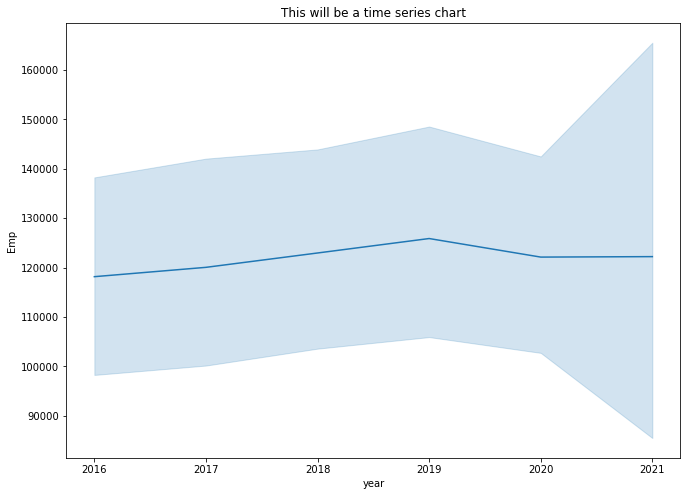

In [22]:
plt.figure(figsize=(11,8))
sns.lineplot(x="year", y="Emp",
                palette="ch:r=-.2,d=.3_r",
                data=census_light)
plt.title('This will be a time series chart')
plt.show()